In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../data/BrentOilPrices.csv')

# Attempt to parse dates using the expected format '%d-%b-%y'
try:
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
except ValueError:
    print("Some dates could not be parsed with the specified format. Trying mixed format...")

    # If the above fails, try parsing with mixed formats
    data['Date'] = pd.to_datetime(data['Date'], format='mixed', errors='coerce')

# Drop rows with invalid or missing dates
data.dropna(subset=['Date'], inplace=True)

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Save the cleaned data to a CSV file
data.to_csv('../data/cleaned_data.csv', index=True)

# Display the first few rows to verify
print(data.head())

            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


In [3]:
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR

# Assume we have additional variables (e.g., GDP, Inflation, Exchange Rates)
# For demonstration, let's create synthetic data
data['GDP'] = data['Price'].rolling(window=30).mean() + np.random.normal(0, 10, len(data))
data['Inflation'] = data['Price'].pct_change().rolling(window=30).mean() * 100
data['Exchange_Rate'] = 1 / (data['Price'] / 100)  # Simplified USD exchange rate

# Drop NaN values introduced by rolling calculations
data.dropna(inplace=True)

# Fit VAR model
model = VAR(data[['Price', 'GDP', 'Inflation', 'Exchange_Rate']])
results = model.fit()

# Print summary
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Feb, 2025
Time:                     01:24:36
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -4.82370
Nobs:                     8329.00    HQIC:                  -4.83481
Log likelihood:          -27094.8    FPE:                 0.00790250
AIC:                     -4.84058    Det(Omega_mle):      0.00788355
--------------------------------------------------------------------
Results for equation Price
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.046946         0.070730            0.664           0.507
L1.Price                 1.001339         0.001345          744.389           0.000
L1.GDP                  -0.002157         0.0011

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [4]:
# Install the arch package


from arch import arch_model

# Fit GARCH(1,1) model
model_garch = arch_model(data['Price'], vol='Garch', p=1, q=1)
res_garch = model_garch.fit(disp='off')

# Print summary
print(res_garch.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -31754.3
Distribution:                  Normal   AIC:                           63516.7
Method:            Maximum Likelihood   BIC:                           63544.8
                                        No. Observations:                 8330
Date:                Mon, Feb 24 2025   Df Residuals:                     8329
Time:                        01:25:14   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            18.5072      0.171    108.109      0.000 [ 18.172, 18.84

In [5]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on differenced data
diff_data = data['Price'].diff().dropna()
adf_test_diff = adfuller(diff_data)
print(f"ADF Statistic (Differenced): {adf_test_diff[0]:.4f}")
print(f"p-value (Differenced): {adf_test_diff[1]:.4f}")

ADF Statistic (Differenced): -12.4421
p-value (Differenced): 0.0000


In [6]:
from statsmodels.tsa.stattools import acf, pacf

# Compute ACF and PACF for the differenced data
acf_values = acf(diff_data, nlags=40)
pacf_values = pacf(diff_data, nlags=40)

# Display ACF and PACF values
print("ACF Values:")
for i, value in enumerate(acf_values):
    print(f"Lag {i}: {value:.4f}")

print("\nPACF Values:")
for i, value in enumerate(pacf_values):
    print(f"Lag {i}: {value:.4f}")

ACF Values:
Lag 0: 1.0000
Lag 1: 0.0296
Lag 2: -0.0064
Lag 3: 0.0032
Lag 4: 0.0036
Lag 5: 0.0149
Lag 6: -0.0011
Lag 7: 0.0049
Lag 8: 0.0117
Lag 9: 0.0273
Lag 10: 0.0093
Lag 11: -0.0027
Lag 12: 0.0038
Lag 13: 0.0022
Lag 14: 0.0612
Lag 15: 0.0161
Lag 16: -0.0166
Lag 17: -0.0173
Lag 18: -0.0051
Lag 19: 0.0299
Lag 20: 0.0027
Lag 21: -0.0029
Lag 22: -0.0006
Lag 23: 0.0256
Lag 24: 0.0434
Lag 25: 0.0061
Lag 26: 0.0075
Lag 27: -0.0071
Lag 28: 0.0079
Lag 29: 0.0409
Lag 30: 0.0089
Lag 31: 0.0048
Lag 32: 0.0101
Lag 33: 0.0082
Lag 34: 0.0416
Lag 35: -0.0122
Lag 36: 0.0019
Lag 37: -0.0043
Lag 38: 0.0247
Lag 39: 0.0330
Lag 40: 0.0153

PACF Values:
Lag 0: 1.0000
Lag 1: 0.0296
Lag 2: -0.0073
Lag 3: 0.0036
Lag 4: 0.0033
Lag 5: 0.0148
Lag 6: -0.0019
Lag 7: 0.0052
Lag 8: 0.0113
Lag 9: 0.0267
Lag 10: 0.0076
Lag 11: -0.0029
Lag 12: 0.0037
Lag 13: 0.0014
Lag 14: 0.0606
Lag 15: 0.0123
Lag 16: -0.0169
Lag 17: -0.0175
Lag 18: -0.0057
Lag 19: 0.0281
Lag 20: 0.0010
Lag 21: -0.0028
Lag 22: -0.0019
Lag 23: 0.0224


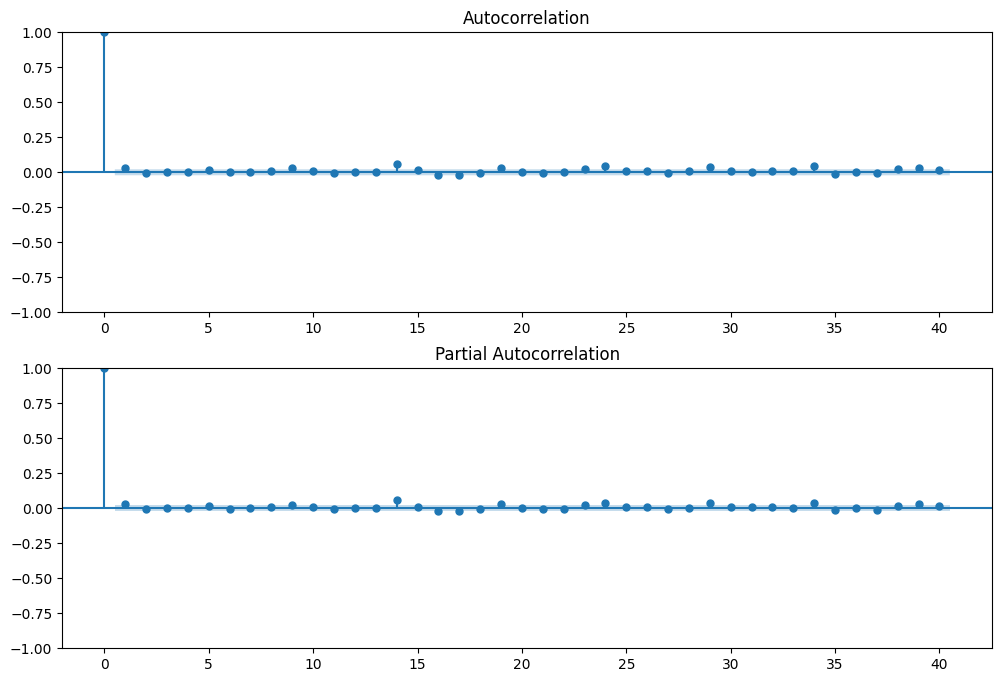

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff_data, lags=40, ax=axes[0])
plot_pacf(diff_data, lags=40, ax=axes[1])
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(0,1,0) model
model_arima_010 = ARIMA(data['Price'], order=(0, 1, 0))
results_arima_010 = model_arima_010.fit()

# Print summary
print("ARIMA(0,1,0) Summary:")
print(results_arima_010.summary())

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0,1,0) Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 8330
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -12607.764
Date:                Mon, 24 Feb 2025   AIC                          25217.528
Time:                        01:26:46   BIC                          25224.555
Sample:                             0   HQIC                         25219.928
                               - 8330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2088      0.008    151.639      0.000       1.193       1.224
Ljung-Box (L1) (Q):                   7.29   Jarque-Bera (JB):             28569.25
Prob(Q):                 

In [9]:
# Fit ARIMA(1,1,1) model
model_arima_111 = ARIMA(data['Price'], order=(1, 1, 1))
results_arima_111 = model_arima_111.fit()

# Print summary
print("ARIMA(1,1,1) Summary:")
print(results_arima_111.summary())

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,1) Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 8330
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12603.831
Date:                Mon, 24 Feb 2025   AIC                          25213.662
Time:                        01:27:14   BIC                          25234.744
Sample:                             0   HQIC                         25220.863
                               - 8330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2290      0.214     -1.068      0.285      -0.649       0.191
ma.L1          0.2591      0.213      1.218      0.223      -0.158       0.676
sigma2         1.2076      0.0

In [10]:


import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Forecast for ARIMA(0,1,0)
forecast_010 = results_arima_010.forecast(steps=30)
y_true = data['Price'][-30:]
rmse_010 = np.sqrt(mean_squared_error(y_true, forecast_010))
mae_010 = mean_absolute_error(y_true, forecast_010)

# Forecast for ARIMA(1,1,1)
forecast_111 = results_arima_111.forecast(steps=30)
rmse_111 = np.sqrt(mean_squared_error(y_true, forecast_111))
mae_111 = mean_absolute_error(y_true, forecast_111)

# Print evaluation metrics
print(f"ARIMA(0,1,0) - RMSE: {rmse_010:.2f}, MAE: {mae_010:.2f}")
print(f"ARIMA(1,1,1) - RMSE: {rmse_111:.2f}, MAE: {mae_111:.2f}")

ARIMA(0,1,0) - RMSE: 15.95, MAE: 14.78
ARIMA(1,1,1) - RMSE: 16.12, MAE: 14.96


c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import numpy as np

# Step 1: Fit ARIMA(0,1,0) model
arima_model = ARIMA(data['Price'], order=(0, 1, 0))
arima_results = arima_model.fit()

# Print ARIMA summary
print("ARIMA(0,1,0) Summary:")
print(arima_results.summary())

# Step 2: Extract residuals from ARIMA model
arima_residuals = arima_results.resid

# Step 3: Fit GARCH(1,1) model to residuals
garch_model = arch_model(arima_residuals, vol='Garch', p=1, q=1, dist='Normal')
garch_results = garch_model.fit(disp='off')

# Print GARCH summary
print("\nGARCH(1,1) Summary:")
print(garch_results.summary())

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0,1,0) Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 8330
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -12607.764
Date:                Mon, 24 Feb 2025   AIC                          25217.528
Time:                        01:30:23   BIC                          25224.555
Sample:                             0   HQIC                         25219.928
                               - 8330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2088      0.008    151.639      0.000       1.193       1.224
Ljung-Box (L1) (Q):                   7.29   Jarque-Bera (JB):             28569.25
Prob(Q):                 

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Backtest on the last 30 days
y_true = data['Price'][-30:]

# ARIMA forecast
arima_backtest = arima_results.forecast(steps=30)

# GARCH forecast (volatility)
garch_backtest_volatility = np.sqrt(garch_results.forecast(horizon=30).variance.values[-1, :])

# Compute error metrics for mean forecast
rmse_arima = np.sqrt(mean_squared_error(y_true, arima_backtest))
mae_arima = mean_absolute_error(y_true, arima_backtest)

print(f"ARIMA Mean Forecast - RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}")

ARIMA Mean Forecast - RMSE: 15.95, MAE: 14.78


c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
# Step 1: Forecast using ARIMA(0,1,0)
arima_forecast = arima_results.get_forecast(steps=30)
mean_forecast = arima_forecast.predicted_mean

# Step 2: Forecast volatility using GARCH(1,1)
garch_forecast = garch_results.forecast(horizon=30)
volatility_forecast = np.sqrt(garch_forecast.variance.values[-1, :])

# Display forecasts
print("Mean Forecast (Next 30 Days):")
print(mean_forecast)

print("\nVolatility Forecast (Next 30 Days):")
print(volatility_forecast)

Mean Forecast (Next 30 Days):
8330    9.12
8331    9.12
8332    9.12
8333    9.12
8334    9.12
8335    9.12
8336    9.12
8337    9.12
8338    9.12
8339    9.12
8340    9.12
8341    9.12
8342    9.12
8343    9.12
8344    9.12
8345    9.12
8346    9.12
8347    9.12
8348    9.12
8349    9.12
8350    9.12
8351    9.12
8352    9.12
8353    9.12
8354    9.12
8355    9.12
8356    9.12
8357    9.12
8358    9.12
8359    9.12
Name: predicted_mean, dtype: float64

Volatility Forecast (Next 30 Days):
[3.59870781 3.59892444 3.59914106 3.59935766 3.59957425 3.59979083
 3.6000074  3.60022395 3.60044049 3.60065701 3.60087352 3.60109002
 3.60130651 3.60152298 3.60173944 3.60195589 3.60217233 3.60238875
 3.60260516 3.60282155 3.60303793 3.6032543  3.60347066 3.603687
 3.60390333 3.60411965 3.60433596 3.60455225 3.60476853 3.60498479]


c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


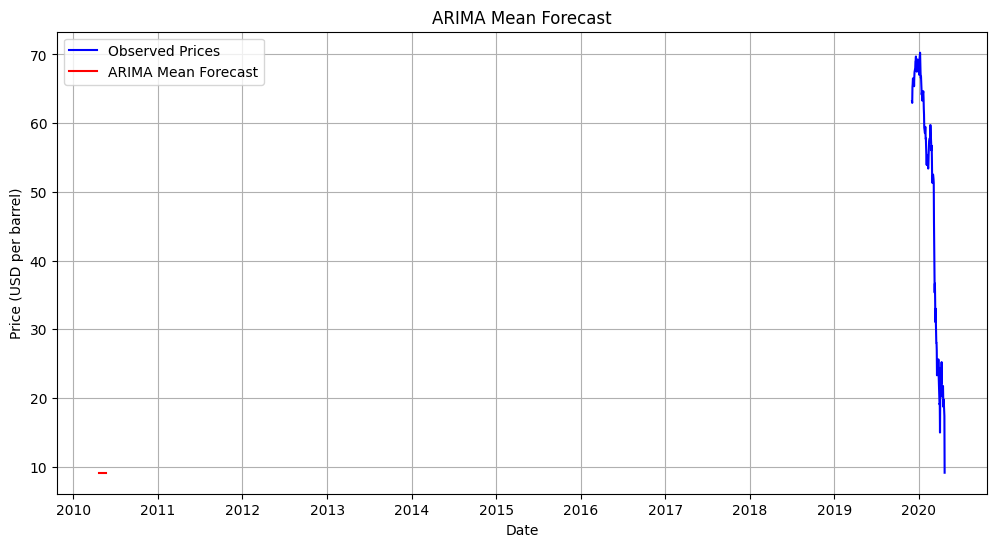

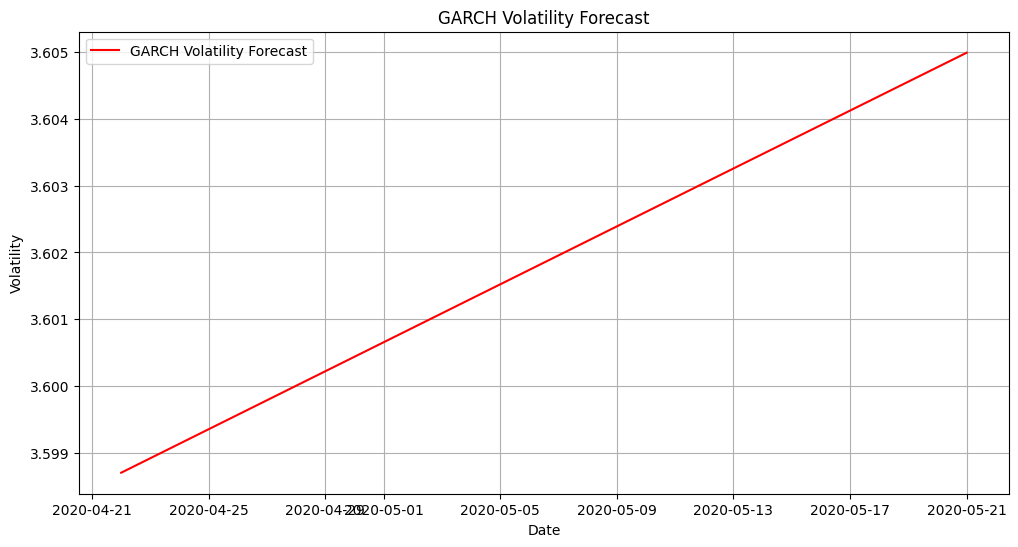

In [39]:
import matplotlib.pyplot as plt

# Convert PeriodIndex to DatetimeIndex if needed
if isinstance(data.index, pd.PeriodIndex):
	data.index = data.index.to_timestamp()

# Plot mean forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], data['Price'][-100:], label='Observed Prices', color='blue')
plt.plot(mean_forecast.index, mean_forecast, label='ARIMA Mean Forecast', color='red')

plt.title('ARIMA Mean Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid(True)
plt.show()

# Plot volatility forecast
plt.figure(figsize=(12, 6))

# Generate date range for the forecast period
forecast_dates = pd.date_range(data.index[-1], periods=31, freq='D')[1:]

plt.plot(forecast_dates, volatility_forecast, label='GARCH Volatility Forecast', color='red')
plt.title('GARCH Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the date index has a frequency
data.index = pd.DatetimeIndex(data.index).to_period('D')

# Step 1: Fit ARIMA(0,1,0) model
arima_model = ARIMA(data['Price'], order=(0, 1, 0))
arima_results = arima_model.fit()

# Print ARIMA summary
print("ARIMA(0,1,0) Summary:")
print(arima_results.summary())

# Step 2: Extract residuals from ARIMA model
arima_residuals = arima_results.resid

# Step 3: Fit GARCH(1,1) model to residuals
garch_model = arch_model(arima_residuals, vol='Garch', p=1, q=1, dist='Normal')
garch_results = garch_model.fit(disp='off')

# Print GARCH summary
print("\nGARCH(1,1) Summary:")
print(garch_results.summary())

# Step 4: Forecast using ARIMA(0,1,0)
arima_forecast = arima_results.get_forecast(steps=30)
mean_forecast = arima_forecast.predicted_mean

# Step 5: Forecast volatility using GARCH(1,1)
garch_forecast = garch_results.forecast(horizon=30)
volatility_forecast = np.sqrt(garch_forecast.variance.values[-1, :])

# Display forecasts
print("Mean Forecast (Next 30 Days):")
print(mean_forecast)

print("\nVolatility Forecast (Next 30 Days):")
print(volatility_forecast)

# Step 6: Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Backtest on the last 30 days
y_true = data['Price'][-30:]

# ARIMA forecast
arima_backtest = arima_results.forecast(steps=30)

# Compute error metrics for mean forecast
rmse_arima = np.sqrt(mean_squared_error(y_true, arima_backtest))
mae_arima = mean_absolute_error(y_true, arima_backtest)

print(f"ARIMA Mean Forecast - RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}")

ARIMA(0,1,0) Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 8330
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -12607.764
Date:                Mon, 24 Feb 2025   AIC                          25217.528
Time:                        01:46:35   BIC                          25224.555
Sample:                    07-02-1987   HQIC                         25219.928
                         - 04-21-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2088      0.008    151.639      0.000       1.193       1.224
Ljung-Box (L1) (Q):                   7.29   Jarque-Bera (JB):             28569.25
Prob(Q):                 

In [41]:
# Add exogenous variables (e.g., GDP, Inflation)
# Replace ... with actual data or a meaningful calculation
# Ensure the data is numeric and has no missing values

# Example using rolling mean with some noise
data['GDP'] = data['Price'].rolling(window=30).mean() + np.random.normal(0, 1, len(data))
data['Inflation'] = data['Price'].pct_change().rolling(window=30).mean() * 100

# Drop NaN values introduced by rolling calculations
data.dropna(inplace=True)

# Convert to numeric, coercing errors to NaN
data['GDP'] = pd.to_numeric(data['GDP'], errors='coerce')
data['Inflation'] = pd.to_numeric(data['Inflation'], errors='coerce')

# Remove any rows with NaN values in 'GDP' or 'Inflation'
data.dropna(subset=['GDP', 'Inflation'], inplace=True)

# Fit ARIMAX model
arimax_model = ARIMA(data['Price'], order=(0, 1, 0), exog=data[['GDP', 'Inflation']])
arimax_results = arimax_model.fit()

# Print summary
print(arimax_results.summary())

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 8300
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -10672.297
Date:                Mon, 24 Feb 2025   AIC                          21350.594
Time:                        01:59:21   BIC                          21371.666
Sample:                             0   HQIC                         21357.794
                               - 8300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            0.0144      0.006      2.254      0.024       0.002       0.027
Inflation      6.0736      0.049    124.774      0.000       5.978       6.169
sigma2         0.7665      0.006    132.462      0.0

In [42]:
# Split data into training and testing sets
train_data = data[:-30]  # Use all but the last 30 days for training
test_data = data[-30:]   # Use the last 30 days for testing

# Train ARIMA-GARCH on training data
arima_model = ARIMA(train_data['Price'], order=(0, 1, 0))
arima_results = arima_model.fit()

# Forecast mean
arima_forecast = arima_results.forecast(steps=30)

# Fit GARCH on residuals
garch_model = arch_model(arima_results.resid, vol='Garch', p=1, q=1, dist='Normal')
garch_results = garch_model.fit(disp='off')

# Forecast volatility
garch_forecast = garch_results.forecast(horizon=30)
volatility_forecast = np.sqrt(garch_forecast.variance.values[-1, :])

# Evaluate forecasts
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(test_data['Price'], arima_forecast))
mae = mean_absolute_error(test_data['Price'], arima_forecast)

print(f"Out-of-Sample RMSE: {rmse:.2f}, MAE: {mae:.2f}")

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Out-of-Sample RMSE: 22.51, MAE: 21.70


c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [43]:
# Split data into training and testing sets
train_data = data[:-30]  # Use all but the last 30 days for training
test_data = data[-30:]   # Use the last 30 days for testing

# Train ARIMAX model on training data
arimax_model = ARIMA(train_data['Price'], order=(0, 1, 0), exog=train_data[['GDP', 'Inflation']])
arimax_results = arimax_model.fit()

# Forecast using test data
forecast = arimax_results.forecast(steps=30, exog=test_data[['GDP', 'Inflation']])

# Evaluate forecasts
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(test_data['Price'], forecast))
mae = mean_absolute_error(test_data['Price'], forecast)

print(f"Out-of-Sample RMSE: {rmse:.2f}, MAE: {mae:.2f}")

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Out-of-Sample RMSE: 12.11, MAE: 11.71


c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [46]:
# Add exchange rate data
data['Exchange_Rate'] = 1 / (data['Price'] / 100)  # Example: simplified inverse of price
data['Exchange_Rate'] = pd.to_numeric(data['Exchange_Rate'], errors='coerce')

# Drop rows with NaN values in 'Exchange_Rate'
data.dropna(subset=['Exchange_Rate'], inplace=True)

# Train ARIMAX with additional variable
arimax_model = ARIMA(data['Price'], order=(0, 1, 0), exog=data[['GDP', 'Inflation', 'Exchange_Rate']])
arimax_results = arimax_model.fit()

# Print summary
print(arimax_results.summary())

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 8300
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -10530.061
Date:                Mon, 24 Feb 2025   AIC                          21068.122
Time:                        02:09:49   BIC                          21096.218
Sample:                             0   HQIC                         21077.721
                               - 8300                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
GDP               0.0143      0.006      2.286      0.022       0.002       0.027
Inflation         4.9531      0.058     85.282      0.000       4.839       5.067
Exchange_Rate    -1.7297      0.027    -

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


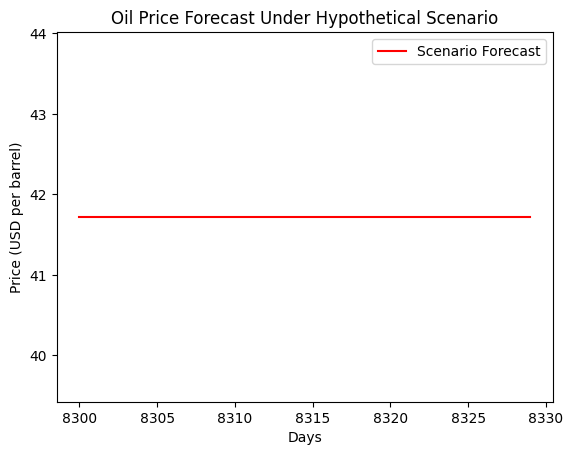

In [48]:
# Create a hypothetical scenario (e.g., 2% drop in GDP and 1% rise in inflation)
scenario_data = pd.DataFrame({
    'GDP': [-0.02] * 30,  # 2% drop in GDP
    'Inflation': [0.01] * 30,  # 1% rise in inflation
    'Exchange_Rate': [data['Exchange_Rate'].mean()] * 30  # Use the mean exchange rate
})

# Forecast under the scenario
forecast_scenario = arimax_results.forecast(steps=30, exog=scenario_data)

# Plot the forecast
plt.plot(forecast_scenario, label='Scenario Forecast', color='red')
plt.title('Oil Price Forecast Under Hypothetical Scenario')
plt.xlabel('Days')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


8300    47.636306
8301    47.636306
8302    47.636306
8303    47.636306
8304    47.636306
8305    47.636306
8306    47.636306
8307    47.636306
8308    47.636306
8309    47.636306
8310    47.636306
8311    47.636306
8312    47.636306
8313    47.636306
8314    47.636306
8315    47.636306
8316    47.636306
8317    47.636306
8318    47.636306
8319    47.636306
8320    47.636306
8321    47.636306
8322    47.636306
8323    47.636306
8324    47.636306
8325    47.636306
8326    47.636306
8327    47.636306
8328    47.636306
8329    47.636306
Name: predicted_mean, dtype: float64


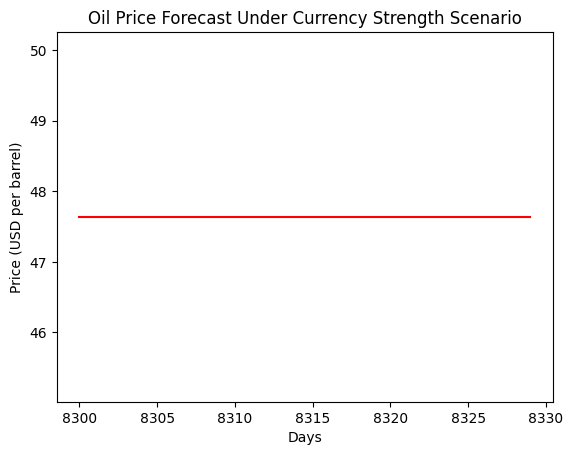

In [52]:
# Create a hypothetical scenario (e.g., 1% appreciation in USD)
scenario_data = pd.DataFrame({
    'GDP': [0.0] * 30,          # No change in GDP
    'Inflation': [0.0] * 30,    # No change in inflation
    'Exchange_Rate': [-0.01] * 30  # 1% appreciation in USD
})

# Forecast under the scenario
forecast_scenario = arimax_results.forecast(steps=30, exog=scenario_data)

# Plot the forecast
plt.plot(forecast_scenario, label='Scenario Forecast', color='red')
plt.title('Oil Price Forecast Under Currency Strength Scenario')
plt.xlabel('Days')
plt.ylabel('Price (USD per barrel)')
print(forecast_scenario)
plt.show()

In [54]:
# Add binary indicator for political events
data['Political_Event'] = np.random.randint(0, 2, size=len(data))  # Load or create event data (1 if event occurs, 0 otherwise)

# Train ARIMAX with political events
arimax_model = ARIMA(data['Price'], order=(0, 1, 0), exog=data[['GDP', 'Inflation', 'Exchange_Rate', 'Political_Event']])
arimax_results = arimax_model.fit()

# Print summary
print(arimax_results.summary())

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 8300
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -10530.036
Date:                Mon, 24 Feb 2025   AIC                          21070.073
Time:                        02:16:26   BIC                          21105.192
Sample:                             0   HQIC                         21082.071
                               - 8300                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
GDP                 0.0143      0.006      2.288      0.022       0.002       0.027
Inflation           4.9530      0.058     85.254      0.000       4.839       5.067
Exchange_Rate      -1.7295      

In [56]:
import pickle

# Save the ARIMAX model
with open('../models/arimax_model.pkl', 'wb') as file:
    pickle.dump(arimax_results, file)

print("ARIMAX model saved successfully.")

ARIMAX model saved successfully.


In [58]:
# Load the ARIMAX model
with open('../models/arimax_model.pkl', 'rb') as file:
    loaded_arimax_model = pickle.load(file)

print("ARIMAX model loaded successfully.")

ARIMAX model loaded successfully.


In [60]:
from statsmodels.tsa.arima.model import ARIMAResults

# Save the ARIMAX model using statsmodels
arimax_results.save('../models/arimax_model.statsmodels')

print("ARIMAX model saved successfully.")

# Load the saved model
loaded_arimax_model = ARIMAResults.load('../models/arimax_model.statsmodels')
print("ARIMAX model loaded successfully.")

ARIMAX model saved successfully.
ARIMAX model loaded successfully.


In [61]:
from sklearn.model_selection import TimeSeriesSplit

# Define time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation
rmse_scores = []
mae_scores = []

for train_index, test_index in tscv.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    # Train ARIMAX model
    arimax_model = ARIMA(train_data['Price'], order=(0, 1, 0), exog=train_data[['GDP', 'Inflation', 'Exchange_Rate']])
    arimax_results = arimax_model.fit()

    # Forecast
    forecast = arimax_results.forecast(steps=len(test_data), exog=test_data[['GDP', 'Inflation', 'Exchange_Rate']])

    # Evaluate
    rmse = np.sqrt(mean_squared_error(test_data['Price'], forecast))
    mae = mean_absolute_error(test_data['Price'], forecast)

    rmse_scores.append(rmse)
    mae_scores.append(mae)

# Print results
print(f"Cross-Validation RMSE: {np.mean(rmse_scores):.2f}, MAE: {np.mean(mae_scores):.2f}")

c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer

Cross-Validation RMSE: 21.54, MAE: 18.79


c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hp\Videos\Birhan Energies\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [64]:
# Ensure forecast and volatility_forecast have the same length
forecast_len = min(len(forecast), len(volatility_forecast))

# Create date range for the forecast period
forecast_dates = pd.date_range(data.index[-1], periods=forecast_len + 1, freq='D')[1:]

# Save forecasts to a CSV file
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Price': forecast[:forecast_len],
    'Forecasted_Volatility': volatility_forecast[:forecast_len]
})

forecast_df.to_csv('../outputs/forecasts.csv', index=False)
print("Forecasts saved to forecasts.csv.")

Forecasts saved to forecasts.csv.


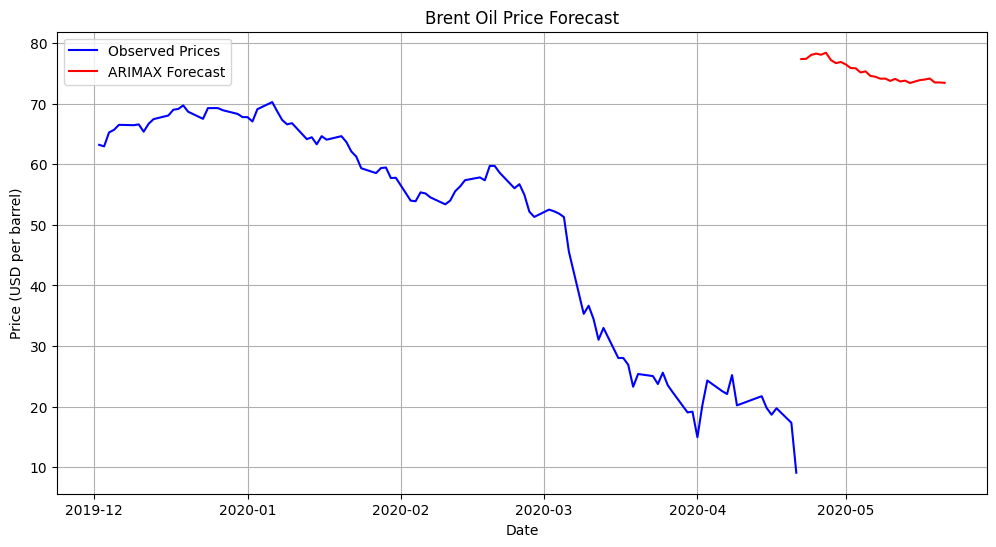

Visualization saved to price_forecast.png.


In [68]:
# Save plots as images
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], data['Price'][-100:], label='Observed Prices', color='blue')

# Ensure forecast and date range have the same length
forecast_len = min(len(forecast), 30)
forecast_dates = pd.date_range(data.index[-1], periods=forecast_len + 1, freq='D')[1:]

plt.plot(forecast_dates, forecast[:forecast_len], label='ARIMAX Forecast', color='red')
plt.title('Brent Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid(True)
plt.savefig('../outputs/price_forecast.png', dpi=300)
plt.show()

print("Visualization saved to price_forecast.png.")